# Fake News Detection System

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report , confusion_matrix
import re
import string


### Importing the Dataset

In [2]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [3]:
data_fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### Assigning Classes to the Dataset

In [5]:
data_fake["class"]=0
data_true["class"] = 1

### Checking Number of Rows and Columns in the Dataset

In [6]:
data_fake.shape , data_true.shape

((23481, 5), (21417, 5))

### Manual Testing of Both the Datasets

In [7]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i] , axis = 0 , inplace = True)

data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i] , axis = 0 , inplace = True)

### Assigning Classes to the Dataset

In [8]:
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1

C:\Users\hp\AppData\Local\Temp\ipykernel_18720\277247672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
C:\Users\hp\AppData\Local\Temp\ipykernel_18720\277247672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


### Merging Both the Datasets

In [9]:
data_merge = pd.concat([data_fake,data_true] , axis = 0 )
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


### Dropping Unwanted Columns

In [10]:
data = data_merge.drop(['title' , 'subject' , 'date'] , axis= 1)

In [11]:
data.head(5)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


### Create a Function to Clean Text

In [12]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," " ,text)
    text = re.sub('https?://\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\hp\AppData\Local\Temp\ipykernel_18720\3417431953.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]','',text)
C:\Users\hp\AppData\Local\Temp\ipykernel_18720\3417431953.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+','',text)
C:\Users\hp\AppData\Local\Temp\ipykernel_18720\3417431953.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*','',text)


### Applying Function to Text Column and Assigning x and y

In [13]:
data['text'] = data['text'].apply(wordopt)

In [14]:
x = data['text']
y = data['class']

### Defining Training and Testing Data and Splitting Them Into 70-30 Percent Ratio

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3)

### Converting Raw Data Into Matrix For Furthur Process

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Creating First Model

In [17]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Checking Model Accuracy and Classfication Report

In [18]:
pred_lr = LR.predict(xv_test)
print("Logistic Regression Model Accuracy :",LR.score(xv_test , y_test))
print("\n Confusion Matrix :\n",confusion_matrix(y_test , pred_lr))
print("\n Classification Report :\n",classification_report(y_test , pred_lr))

Logistic Regression Model Accuracy : 0.9864081996434938

 Confusion Matrix :
 [[6973  101]
 [  82 6308]]

 Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7074
           1       0.98      0.99      0.99      6390

    accuracy                           0.99     13464
   macro avg       0.99      0.99      0.99     13464
weighted avg       0.99      0.99      0.99     13464



### Creating a Second Model

In [19]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train , y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Checking Model Accuracy and Classfication Report

In [20]:
pred_dt = DT.predict(xv_test)
print("Decision Tree Classifier Model Accuracy is:" , DT.score(xv_test , y_test))
print("\n Confusion Matrix:\n",confusion_matrix(y_test , pred_dt))
print("\n Classification Report:\n",classification_report(y_test , pred_dt))


Decision Tree Classifier Model Accuracy is: 0.9964349376114082

 Confusion Matrix:
 [[7054   20]
 [  28 6362]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7074
           1       1.00      1.00      1.00      6390

    accuracy                           1.00     13464
   macro avg       1.00      1.00      1.00     13464
weighted avg       1.00      1.00      1.00     13464



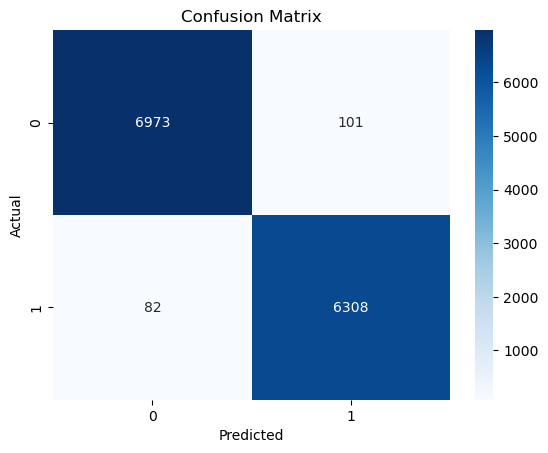

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Checking Fake News

In [22]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n== 1:
        return "Not a Fake News"

def manual_testing(news):
    testing_news = {"text" :[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)

    return print("\n\nLR Prediction:{} \nDT Prediction:{}" .format(output_label(pred_LR[0]),output_label(pred_DT[0])))

In [27]:
news = str(input())
manual_testing(news)

 Bravo! Polish prime minister Beata Szydlo just put her foot down! She told the EU that Poland will not be  blackmailed  into accepting thousands of refugees under the EU quota system. Szydlo hammered the weak EU for allowing the slow death of European culture and its people by taking in millions of refugees that are destroying the Western nations financially, socially and culturally. In a fantastic speech before the Polish Parliament, Szydlo urged lawmakers to protect Poland and its children from the scourges of Islamist terrorism and cultural suicide:Where are you headed, Europe? Rise from your knees and from your lethargy, or you will be crying over your children every day.If you cannot see that terrorism has the potential to hurt every country in Europe, and you think that Poland should not defend itself, you are going hand in hand with those who point this weapon against Europe, against all of us.Do we want politicians who say we have to  get used to  terrorist attacks?Prime Minis



LR Prediction:Fake News 
DT Prediction:Fake News


In [25]:
import joblib
joblib.dump(LR, 'fake_news_model.pkl')
# To load later
# model = joblib.load('fake_news_model.pkl')


['fake_news_model.pkl']